In [37]:
import numpy as np
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
from sklearn import preprocessing
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

['fundamentals.csv', 'fundamentals.csv.zip', 'prices-split-adjusted.csv', 'prices-split-adjusted.csv.zip', 'prices.csv', 'prices.csv.zip', 'securities.csv']


In [38]:
data_df =  pd.read_csv("./input/prices-split-adjusted.csv", index_col = 0)
data_df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [39]:
data_df = data_df[data_df.symbol == 'IBM']
data_df = data_df.drop(['symbol'],axis='columns')
data_df.head()

,open,close,low,high,volume
date,,,,,
2010-01-04,131.179993,132.449997,130.850006,132.970001,6155300.0
2010-01-05,131.679993,130.850006,130.100006,131.850006,6841400.0
2010-01-06,130.679993,130.000000,129.809998,131.490005,5605300.0
2010-01-07,129.869995,129.550003,128.910004,130.250000,5840600.0
2010-01-08,129.070007,130.850006,129.050003,130.919998,4197200.0


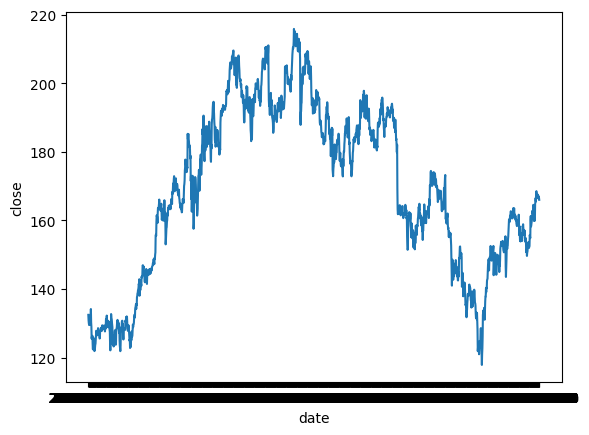

In [40]:
from matplotlib import pyplot as plt

plt.plot(data_df['close'])
plt.xlabel("date")
plt.ylabel("close")
plt.show()

In [41]:
data_df['date'] = data_df.index
data_df.head()

,open,close,low,high,volume,date
date,,,,,,
2010-01-04,131.179993,132.449997,130.850006,132.970001,6155300.0,2010-01-04
2010-01-05,131.679993,130.850006,130.100006,131.850006,6841400.0,2010-01-05
2010-01-06,130.679993,130.000000,129.809998,131.490005,5605300.0,2010-01-06
2010-01-07,129.869995,129.550003,128.910004,130.250000,5840600.0,2010-01-07
2010-01-08,129.070007,130.850006,129.050003,130.919998,4197200.0,2010-01-08


In [42]:
data_df['date'] = pd.to_datetime(data_df['date'])
data_df.head()

,open,close,low,high,volume,date
date,,,,,,
2010-01-04,131.179993,132.449997,130.850006,132.970001,6155300.0,2010-01-04
2010-01-05,131.679993,130.850006,130.100006,131.850006,6841400.0,2010-01-05
2010-01-06,130.679993,130.000000,129.809998,131.490005,5605300.0,2010-01-06
2010-01-07,129.869995,129.550003,128.910004,130.250000,5840600.0,2010-01-07
2010-01-08,129.070007,130.850006,129.050003,130.919998,4197200.0,2010-01-08


In [43]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(data_df['close'].values.reshape(-1, 1))
dataset[0:10]

array([[0.14905562],
       [0.13272085],
       [0.12404289],
       [0.11944874],
       [0.13272085],
       [0.11873402],
       [0.12924958],
       [0.12639099],
       [0.14762633],
       [0.14221542]])

In [44]:
print(len(data_df))

def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

1762


In [45]:
x_IBM, y_IBM = create_dataset(dataset, look_back=15)

In [46]:
print(x_IBM.shape)
print(y_IBM.shape)

(1746, 15)
(1746,)


In [47]:
x_IBM = np.reshape(x_IBM, (x_IBM.shape[0], 1, x_IBM.shape[-1]))
print(x_IBM.shape)
print(y_IBM.shape)

(1746, 1, 15)
(1746,)


In [48]:
import tensorflow as tf



# Assuming your model is saved as "my_model" in the "models" folder

model_path = r"C:\Pratham\programmingProjects\pythonProgrammes\Python-code-practice\StockProject\my_model.keras"



loaded_model = tf.keras.models.load_model(model_path)

In [49]:
from sklearn.metrics import mean_squared_error
import math

predict = loaded_model.predict(x_IBM)
predict = min_max_scaler.inverse_transform(predict)
y_IBM = min_max_scaler.inverse_transform([y_IBM])

# calculate root mean squared errort

score = math.sqrt(mean_squared_error(y_IBM[0], predict[:,0]))

print('Score: %.2f RMSE' % (score))

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Score: 2.33 RMSE


In [50]:
look_back=15
# shift predictions for plotting
PredictPlot = np.empty_like(dataset)
PredictPlot[:, :] = np.nan
PredictPlot[len(predict)+(look_back*2)+1:len(dataset)-1, :] = predict
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(PredictPlot)
plt.show()

ValueError: could not broadcast input array from shape (1746,1) into shape (0,1)